In [1]:
 ! pip install tensorflow #安裝tensorflow

^C


In [8]:
import tensorflow as tf #查看tendorflow版本
tf.__version__

'2.2.0'

##用六行建構一個神經網路

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, activation = 'relu', input_dim = 3 )) #加入第一層,輸入為3
model.add(Dense(1, activation = 'sigmoid'))  #加入第二層 為使用sigmoid的啟動函數，只有一個神經元，
model.compile(optimizer = 'rmsprop',  #以指定的參數編譯模型      
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [36]:
! nvidia-smi

Sun Jul  5 16:38:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    62W / 149W |    169MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#訓練神經網路的流程-以辨識手寫數字為例

##準備訓練所需資料


###載入MINST資料集

In [37]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images[0]

In [ ]:
train_images.shape

In [41]:
train_labels[0] #第0個訓練標籤是5

5

###畫出手寫圖片

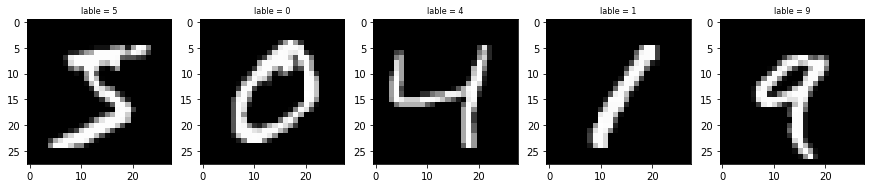

In [42]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4) #設定圖形的寬與高(英吋)

for i in range(5):
  ax = plt.subplot(1, 5, 1 + i) #設定1X5的子圖表,目前要畫第1 + i 個
  ax.imshow(train_images[i], cmap = 'gray') #顯示黑底白字
  ax.set_title('lable = ' + str(train_labels[i]), fontsize = 8) #設定標題


plt.show() #將圖形顯示


In [43]:
test_images.shape

(10000, 28, 28)

###資料預處理


In [44]:
x_train = train_images.reshape(60000, (28 * 28))
x_train = x_train.astype('float32') / 255 #將0~255的向素值轉成0~1的浮點數

x_test = test_images.reshape(10000, (28 *28))
x_test = x_test.astype('float32') /255

In [45]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
x_test.shape

(10000, 784)

###預處理標籤資料

In [47]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
y_train.shape


(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

##建立多元分類模型

In [50]:
from tensorflow.keras.models import Sequential #匯入kerse序列模型
from tensorflow.keras.layers import Dense #匯入kerse的密集層類別

model = Sequential()
model.add(Dense(512, activation = 'relu', input_dim = 784))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


###訓練模型

In [52]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 128) #epochs為設定訓練次數,batch_size為每次提取資料筆數

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2541 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1033 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9887


###評估模型成效


In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('對測試資料集的準確率:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9789
對測試資料集的準確率: 0.9789000153541565


###用模型預測答案


In [54]:
import numpy as np
predict = model.predict(x_test)
predict.round(1) #顯示四捨五入到小數第一位的預測結果

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
#若要直接傳回預測數字可使用predict_classes

predict = model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [56]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

###畫出圖片並標示預測結果與標準答案

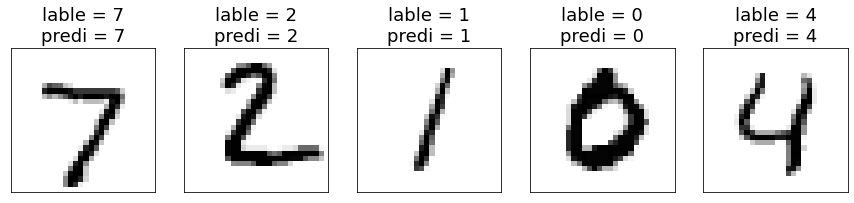

In [57]:
predict = model.predict_classes(x_test)

plt.gcf().set_size_inches(15, 4)

for i in range(5):
  ax = plt.subplot(1, 5, 1 + i)
  ax.imshow(test_images[i], cmap = 'binary') #白底黑字
  ax.set_title('lable = ' + str(test_labels[i]) + '\npredi = ' + str(predict[i]), fontsize = 18)
  ax.set_xticks([]); ax.set_yticks([]) #xy不顯示刻度

plt.show()

###將模型存檔

In [34]:
model.save('MnistModel.h5')

###由檔案載入，並使用模型


In [64]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model


model = load_model('MnistModel.h5') #由檔案載入模型 

(_,_), (test_images, test_labels) = mnist.load_data() #載入MNIST資料集

x_test = test_images.reshape(10000, 28 * 28)
x_test = x_test.astype('float32') / 255
y_test = to_categorical(test_labels) #預處理測試標籤

test_loss, test_acc = model.evaluate(x_test, y_test) #用測試資料評估模型
print('對測試資料的準確率:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9780
對測試資料的準確率: 0.9779999852180481
